In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import os
import psi4
from scipy.optimize import curve_fit

In [5]:
%%time

#Part1


psi4.set_memory('500 MB')

h2o = psi4.geometry("""

O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')
                     


  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/

*** tstart() called on cs020.hpc.nyu.edu
*** at Sun Nov 20 17:14:18 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A1        12      12 
     A2         2       2 
     B1         4       4 
     B2         7       7 
   -------------------------
    Total      25      25
   -------------------------

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|

   @DF-UHF iter SAD:   -38.17696789927330   -3.81770e+01   0.00000e+00 
   @DF-UHF iter   1:   -38.91128821865018   -7.34320e-01   8.65808e-03 DIIS/ADIIS
   @DF-UHF iter   2:   -38.92306196274669   -1.17737e-02   2.85223e-03 DIIS/ADIIS
   @DF-UHF iter   3:   -38.92500652498119   -1.94456e-03   9.40395e-04 DIIS/ADIIS
   @DF-UHF iter   4:   -38.92528087082405   -2.74346e-04   3.66215e-04 DIIS/ADIIS
   @DF-UHF iter   5:   -38.92532918804680   -4.83172e-05   1.12444e-04 DIIS/ADIIS
   @DF-UHF iter   6:   -38.92533421737444   -5.02933e-06   2.80473e-05 DIIS
   @DF-UHF iter   7:   -38.92533459566538   -3.78291e-07   8.92608e-0

-38.92533462893707

In [6]:
%%time

#Part2

psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)


Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on cs020.hpc.nyu.edu
*** at Sun Nov 20 17:14:20 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y        

   @DF-RHF iter   1:   -76.02698979674591    2.13156e-02   5.97563e-04 DIIS/ADIIS
   @DF-RHF iter   2:   -76.02701635203334   -2.65553e-05   3.06093e-04 DIIS/ADIIS
   @DF-RHF iter   3:   -76.02702228538922   -5.93336e-06   4.25710e-05 DIIS
   @DF-RHF iter   4:   -76.02702262857369   -3.43184e-07   1.31663e-05 DIIS
   @DF-RHF iter   5:   -76.02702266375842   -3.51847e-08   2.75997e-06 DIIS
   @DF-RHF iter   6:   -76.02702266596440   -2.20598e-09   4.90725e-07 DIIS
   @DF-RHF iter   7:   -76.02702266602192   -5.75255e-11   6.87868e-08 DIIS
   @DF-RHF iter   8:   -76.02702266602287   -9.52127e-13   1.01762e-08 DIIS
   @DF-RHF iter   9:   -76.02702266602294   -7.10543e-14   8.33460e-10 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1   -20.548577     2A1    -1.343128     1B2    -0.704833  
       3A1    -0.569635     1B1    -0.49

   @DF-RHF iter   0:   -76.02604012282245   -7.60260e+01   3.14831e-04 
   @DF-RHF iter   1:   -76.02703225719557   -9.92134e-04   6.89502e-05 DIIS
   @DF-RHF iter   2:   -76.02703266108132   -4.03886e-07   2.54440e-05 DIIS
   @DF-RHF iter   3:   -76.02703271700395   -5.59226e-08   9.31236e-06 DIIS
   @DF-RHF iter   4:   -76.02703272814371   -1.11398e-08   2.07995e-06 DIIS
   @DF-RHF iter   5:   -76.02703272930354   -1.15983e-09   5.04744e-07 DIIS
   @DF-RHF iter   6:   -76.02703272937443   -7.08837e-11   4.03821e-08 DIIS
   @DF-RHF iter   7:   -76.02703272937481   -3.83693e-13   3.05460e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1   -20.548408     2A1    -1.342234     1B2    -0.705525  
       3A1    -0.568294     1B1    -0.493901  

    Virtual:                                                              

       4

    ------------   -----------------  -----------------  -----------------  -----------------
         O            0.000000000000     0.000000000000    -0.064716289591    15.994914619570
         H            0.000000000000    -0.749045999357     0.513547239547     1.007825032230
         H            0.000000000000     0.749045999357     0.513547239547     1.007825032230

  Running in c2v symmetry.

  Rotational constants: A =     28.16276  B =     14.90611  C =      9.74711 [cm^-1]
  Rotational constants: A = 844298.19551  B = 446873.99760  C = 292211.14876 [MHz]
  Nuclear repulsion =    9.300665063058297

  Charge       = 0
  Multiplicity = 1
  Electrons    = 10
  Nalpha       = 5
  Nbeta        = 5

  ==> Algorithm <==

  SCF Algorithm Type is DF.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-08
  Density threshold  = 1.00e-08
  Integral threshold = 1.00e-12

  ==> Primary Basis <==

  Basis Set: CC-PVDZ
    Ble

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
         O            0

  IR activ [km/mol]            80.9060             21.1699             60.7456        
  Char temp [K]               2554.8346           5918.2094           6060.3121       
  ----------------------------------------------------------------------------------
      1   O                0.00  0.00 -0.07    0.00  0.00  0.05   -0.00 -0.07  0.00   
      2   H               -0.00  0.43  0.56    0.00  0.58 -0.40   -0.00  0.56 -0.43   
      3   H                0.00 -0.43  0.56    0.00 -0.58 -0.40    0.00  0.56  0.43   

  ==> Thermochemistry Components <==

  Entropy, S
    Electronic S            0.000 [cal/(mol K)]        0.000 [J/(mol K)]       0.00000000 [mEh/K] (multiplicity = 1)
    Translational S        34.608 [cal/(mol K)]      144.801 [J/(mol K)]       0.05515177 [mEh/K] (mol. weight = 18.0106 [u], P = 101325.00 [Pa])
    Rotational S           10.376 [cal/(mol K)]       43.414 [J/(mol K)]       0.01653566 [mEh/K] (symmetry no. = 2)
    Vibrational S           0.004 [cal/(mol K)] 

In [7]:
%%time

#Part3

# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)


Scratch directory: /tmp/
  SAPT does not make use of molecular symmetry, further calculations in C1 point group.
   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //              Dimer HF             //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


*** tstart() called on cs020.hpc.nyu.edu
*** at Sun Nov 20 17:14:22 2022

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
         C            0.000000000000    -0.667578000000    -2.128156293677    12.000000000000
         C           -0.000000000000     0.667578000000    -2.128156293677    12.000000000000
         H            0.923621000000    -1.232253000000    -2.129682293677     1.007825032230
         H           -0.923621000000    -1.232253000000    -2.129682293677     1.007825032230
         H           -0.923621000000     1.232253000000    -2.129682293677     1.007825032230
         H            0.923621000000     1.232253000000    -2.129682293677     1.007825032230
      Gh(C)          -0.000000000000    -0.000000000000     2.897005706323    12.000000000000
      Gh(C)          -0.000000000000    -0.000000000000     1.689742706323    12.000000000000
 

   @DF-RHF iter   2:   -76.82303471048505   -3.83153e-02   8.39869e-04 DIIS/ADIIS
   @DF-RHF iter   3:   -76.82724424223163   -4.20953e-03   1.06609e-04 DIIS/ADIIS
   @DF-RHF iter   4:   -76.82736558132737   -1.21339e-04   1.17423e-05 DIIS
   @DF-RHF iter   5:   -76.82736713395806   -1.55263e-06   3.51336e-06 DIIS
   @DF-RHF iter   6:   -76.82736722683700   -9.28789e-08   1.63732e-06 DIIS
   @DF-RHF iter   7:   -76.82736724714429   -2.03073e-08   1.96611e-07 DIIS
   @DF-RHF iter   8:   -76.82736724765013   -5.05835e-10   2.84025e-08 DIIS
   @DF-RHF iter   9:   -76.82736724766089   -1.07576e-11   1.55018e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A    -11.255898     2A    -11.252297     3A     -1.032740  
       4A     -0.768008     5A     -0.679866     6A     -0.409957  
       7A     -0.409952  

    Virtual:         

-0.0022355823909805178

In [8]:
%%time

#Part 4

#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

    Reference energy    (file100)            = -128.496438391293054
    CCSD energy         (file100)            =   -0.210210934373458
    Total CCSD energy   (file100)            = -128.706649325666518

    Number of ijk index combinations:               20
    Memory available in words               :        62500000
    Approx. words needed per explicit thread:           27436
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002807265597011
      * CCSD(T) total energy                  = -128.709456591263518


    Psi4 stopped on: Sunday, 20 November 2022 05:14PM
    Psi4 wall time for execution: 0:00:00.91


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Sm

*** tstop() called on cs020.hpc.nyu.edu at Sun Nov 20 17:14:34 2022
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.04 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       7.64 seconds =       0.13 minutes
	system time =       0.81 seconds =       0.01 minutes
	total time  =         16 seconds =       0.27 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =    0.000000000000000
    SCF energy          (wfn)     = -128.496452944383265
    Reference energy    (file100) = -128.496438391293083

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =     RHF
    Brueckner       =     No
    Memory (Mbytes) =     500.0
    Maxiter         =     50
    R_Conver


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	 A2	   4	    0	    0	    0	    4	    0
	 B1	   10	    0	    1	    0	    9	    0
	 B2	   10	    0	    1	    0	    9	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electro


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	 A2	   4	    0	    0	    0	    4	    0
	 B1	   10	    0	    1	    0	    9	    0
	 B2	   10	    0	    1	    0	    9	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electro


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	SCF energy                   =   -256.99262454201590
	One-electron energy          =   -143.17215101232071
	Two-electron energy          =     62.58823572331141
	Reference energy             =   -256.99259532906638

*** tstop() called on cs020.hpc.nyu.edu at Sun Nov 20 17:14:37 2022
Module time:
	user time   =       0.05 seconds =       0.00 minutes
	system time =       0.04 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       9.92 seconds =       0.17 minutes
	system time =       1.48 seconds =       0.02 minutes
	total time  =         19 seconds =       0.32 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   17.639240355666679
    SCF energy          (wfn)     = -256.992624542015903
    Reference energy    (file100) = -256.992595329

    NB   [     3,    0,    1,    1 ]

  @DF-RHF Final Energy:  -128.49636690611095

   => Energetics <=

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -182.4037140656131442
    Two-Electron Energy =                  53.9073471595022085
    Total Energy =                       -128.4963669061109499

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000      


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.65 s, sys: 1.6 s, total: 7.25 s
Wall time: 13.6 s

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. 

In [5]:
%%time

#For Ar2

#! Example potential energy surface scan and CP-correction for Ar2

ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = np.arange(3.5,6.55,0.05)

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1956958459918496
    Two-Electron Energy =                 201.3946877413606558
    Total Energy =                       -526.8010081046311370

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :        -59.5249867           59.5263730            0.0013862
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =   48.986690359165706
    SCF energy          (wfn)                = -1053.600949392431630
    Reference energy    (file100)            = -1053.600949392433449
    CCSD energy         (file100)            =   -0.333241257491183
    Total CCSD energy   (file100)            = -1053.934190649924631

    Number of ijk index combinations:              120
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:            2048
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.005142320237063
      * CCSD(T) total energy                  = -1053.939332970161786


    Psi4 stopped on: Wednesday, 23 November 2022 12:54PM
    Psi4 wall time for execution: 0:00:02.93


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //          Ma

	Size of irrep 3 of <ia|bc> integrals:      0.022 (MW) /      0.180 (MB)
	Total:                                     0.096 (MW) /      0.768 (MB)

	Size of irrep 0 of tijab amplitudes:       0.004 (MW) /      0.032 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.006 (MB)
	Size of irrep 2 of tijab amplitudes:       0.002 (MW) /      0.016 (MB)
	Size of irrep 3 of tijab amplitudes:       0.002 (MW) /      0.016 (MB)
	Total:                                     0.009 (MW) /      0.069 (MB)

	Nuclear Rep. energy          =      0.00000000000000
	SCF energy                   =   -526.80100646629921
	One-electron energy          =    -35.62972682824925
	Two-electron energy          =     14.75930929218014
	Reference energy             =   -526.80100646630092

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:54:32 2022
Module time:
	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.04 seconds =       0.00 minutes
	total time  =          0

 Magnitude           :                                                    0.0014924

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:54:34 2022
Module time:
	user time   =       1.54 seconds =       0.03 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          2 seconds =       0.03 minutes
Total time:
	user time   =     489.72 seconds =       8.16 minutes
	system time =      35.82 seconds =       0.60 minutes
	total time  =       1147 seconds =      19.12 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :          0.0000000           -0.0000000           -0.0000000
 Magnitude           :                                                    0.0000000

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:54:37 2022
Module time:
	user time   =       1.56 seconds =       0.03 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     492.90 seconds =       8.21 minutes
	system time =      36.01 seconds =       0.60 minutes
	total time  =       1150 seconds =      19.17 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:          


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.1543896315483646
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.154389631548365    0.000e+00    0.000000    0.000000    0.000000    0.104855
     1        -0.164387444839124    2.263e-02    0.002854    0.004534    0.004534    0.113965
     2        -0.166141773005683    5.771e-03    0.003406    0.005319    0.005319    0.116572
     3        -0.166251795649369    1.092e-03    0.003669    0.005743    0.005743    0.116897
  

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Two-electron energy          =     38.92879746862569
	Reference energy             =  -1053.60126906585106

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:54:48 2022
Module time:
	user time   =       0.07 seconds =       0.00 minutes
	system time =       0.03 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =     502.95 seconds =       8.38 minutes
	system time =      36.58 seconds =       0.61 minutes
	total time  =       1161 seconds =      19.35 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   47.625948960300029
    SCF energy          (wfn)     = -1053.601269065849465
    Reference energy    (file100) = -1053.601269065851056

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =

 Magnitude           :                                                    0.0016461

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:54:50 2022
Module time:
	user time   =       1.55 seconds =       0.03 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          2 seconds =       0.03 minutes
Total time:
	user time   =     504.78 seconds =       8.41 minutes
	system time =      36.71 seconds =       0.61 minutes
	total time  =       1163 seconds =      19.38 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

 Magnitude           :                                                    0.0016461

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:54:54 2022
Module time:
	user time   =       1.55 seconds =       0.03 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          2 seconds =       0.03 minutes
Total time:
	user time   =     508.01 seconds =       8.47 minutes
	system time =      36.89 seconds =       0.61 minutes
	total time  =       1167 seconds =      19.45 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 2 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 3 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 4 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 5 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 6 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 7 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Total:                                     0.215 (MW) /      1.721 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <ia|bc> integrals:      0.006 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    4   12   12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 225809 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 12:55:01 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 4
	Number of MOs        = 54
	Number of active MOs = 49
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    4   12   12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 225809 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 12:55:05 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 4
	Number of MOs        = 54
	Number of active MOs = 49
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(

    Number of ijk index combinations:               20
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:           37044
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002530343166353
      * CCSD(T) total energy                  = -526.969778180771641


    Psi4 stopped on: Wednesday, 23 November 2022 12:55PM
    Psi4 wall time for execution: 0:00:03.46


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. S

	Size of irrep 6 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     46.33876115056220
	SCF energy                   =  -1053.60149223911776
	One-electron 

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1954889439584804
    Two-Electron Energy =                 201.3944855819779036
    Total Energy =                       -526.8010033619805199

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :        -63.7765366           63.7782567            0.0017202
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	Frozen core energy     =   -505.93058702928494

	Size of irrep 0 of <ab|cd> integrals:      0.432 (MW) /      3.453 (MB)
	Size of irrep 1 of <ab|cd> integrals:      0.135 (MW) /      1.083 (MB)
	Size of irrep 2 of <ab|cd> integrals:      0.250 (MW) /      2.000 (MB)
	Size of irrep 3 of <ab|cd> integrals:      0.250 (MW) /      2.000 (MB)
	Total:                                     1.067 (MW) /      8.537 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.041 (MW) /      0.326 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.010 (MW) /      0.082 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.022 (MW) /      0.180 (MB)
	

	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	Frozen core energy     =  -1048.55078718451614

	Size of irrep 0 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 1 of <ab|cd> integrals:      0.016 (MW) /      


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Number of AO shells:              22
      Number of SO shells:              11
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:                  8
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  13    2    6    6    2   13    6    6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 134055 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 12:55:27 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 8
	Number of MOs        = 54
	Number of active MOs = 44
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# F


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Two-electron energy          =     38.31712396081738
	Reference energy             =  -1053.60170641579202

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:55:37 2022
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.04 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =     548.07 seconds =       9.13 minutes
	system time =      39.28 seconds =       0.65 minutes
	total time  =       1210 seconds =      20.17 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   44.533354871968861
    SCF energy          (wfn)     = -1053.601706415791568
    Reference energy    (file100) = -1053.601706415792023

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =

	Size of irrep 3 of <ia|bc> integrals:      0.022 (MW) /      0.180 (MB)
	Total:                                     0.096 (MW) /      0.768 (MB)

	Size of irrep 0 of tijab amplitudes:       0.004 (MW) /      0.032 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.006 (MB)
	Size of irrep 2 of tijab amplitudes:       0.002 (MW) /      0.016 (MB)
	Size of irrep 3 of tijab amplitudes:       0.002 (MW) /      0.016 (MB)
	Total:                                     0.009 (MW) /      0.069 (MB)

	Nuclear Rep. energy          =      0.00000000000000
	SCF energy                   =   -526.80100221594103
	One-electron energy          =    -35.62965948228688
	Two-electron energy          =     14.75924391341016
	Reference energy             =   -526.80100221594103

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:55:41 2022
Module time:
	user time   =       0.09 seconds =       0.00 minutes
	system time =       0.05 seconds =       0.00 minutes
	total time  =          1

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.3593672577E-02.
  Reciprocal condition number of the overlap matrix is 1.2478782450E-02.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A1        26      26 
     A2         4       4 
     B1        12      12 
     B2        12      12 
   -------------------------
    Total      54      54
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:  -526.79237559316186   -5.26792e+02   0.00000e+00 
   @RHF iter   1:  -526.80075143966735   -8.37585e-03   7.27130e-04 DIIS/ADIIS
   @RHF iter   2:  -526.80098738717118   -2.35948e-04   1.92981e-04 DIIS/ADIIS
   @RHF iter   3:  -526.80100219892518   -1.48118e-05   4.641


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

   ==> N-Body: Counterpoise Corrected (CP) energies <==

        n-Body     Total Energy            Interaction Energy                          N-body Contribution to Interaction Energy
                   [Eh]                    [Eh]                  [kcal/mol]            [Eh]                  [kcal/mol]
             1  N/A                         0.000000000000        0.000000000000        0.000000000000        0.000000000000
  FULL/RTN   2  N/A                        -0.000180732544       -0.113411383640       -0.000180732544       -0.113411383640


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev4

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Reference energy (file100)                = -1053.601795411670082

    Opposite-spin MP2 correlation energy      =   -0.224289439459750
    Same-spin MP2 correlation energy          =   -0.084916944641943
    Singles MP2 correlation energy            =   -0.000000000000000
    MP2 correlation energy                    =   -0.309206384101692
      * MP2 total energy                      = -1053.911001795771881

    Opposite-spin CCSD correlation energy     =   -0.250776786259239
    Same-spin CCSD correlation energy         =   -0.082051992868316
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.332828779127555
      * CCSD total energy                     = -1053.934624190797649

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Re


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Brueckner       =     No
    Memory (Mbytes) =     524.3
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.3091699143819684
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.309169914381968    0.000

   @RHF iter   4:  -526.80100024218939   -1.57584e-08   6.88690e-07 DIIS
   @RHF iter   5:  -526.80100024277897   -5.89580e-10   4.26967e-08 DIIS
   @RHF iter   6:  -526.80100024278079   -1.81899e-12   9.15969e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1  -118.610654     2A1   -12.322808     1B1    -9.571390  
       1B2    -9.571390     3A1    -9.571389     4A1    -1.278872  
       5A1    -0.592241     2B2    -0.592235     2B1    -0.592235  

    Virtual:                                                              

       6A1     0.087123     3B2     0.119186     3B1     0.119186  
       7A1     0.125339     8A1     0.160162     4B2     0.163635  
       4B1     0.163635     9A1     0.239302    10A1     0.506550  
       5B1     0.539635     5B2     0.539635     1A2     0.541401  
      11A1     0.541401    12A1 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      * MP2 total energy                      = -526.955370791239488

    Opposite-spin CCSD correlation energy     =   -0.125307363032209
    Same-spin CCSD correlation energy         =   -0.040924807850557
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166232170882766
      * CCSD total energy                     = -526.967232413664192

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.801000242781583
    Reference energy    (file100)            = -526.801000242781470
    CCSD energy         (file100)            =   -0.166232170882766
    Total CCSD energy   (file100)            = -526

    Iterations converged.


    Largest TIA Amplitudes:
              1   1         0.0060227245
              6  28         0.0057174002
              7  32         0.0057174002
              2  10         0.0050718423
              3  14         0.0050718423
              5  20        -0.0040553410
              1   0        -0.0026264788
              0   5         0.0025180388
              4  25         0.0024868854
              6  30        -0.0023037917

    Largest TIjAb Amplitudes:
      5   5  23  23        -0.0193026119
      1   5   2  23         0.0189572800
      5   1  23   2         0.0189572800
      1   1   2   2        -0.0188135341
      1   1  23  23        -0.0174307860
      1   5  23   2         0.0168679256
      5   1   2  23         0.0168679256
      5   5   2   2        -0.0164970929
      2   2  11  11        -0.0145935420
      3   3  15  15        -0.0145935420

    SCF energy       (wfn)                    = -1053.601855675661682
    Reference energy (

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1956074211636860
    Two-Electron Energy =                 201.3946081088798223
    Total Energy =                       -526.8009993122839205

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :        -69.7293876           69.7308940            0.0015065
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1956074211628902
    Two-Electron Energy =                 201.3946081088792823
    Total Energy =                       -526.8009993122835795

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :         69.7293876          -69.7308940           -0.0015065
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Brueckner       =     No
    Memory (Mbytes) =     524.3
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.3091055114798850
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.309105511479885    0.000

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.6381477663E-02.
  Reciprocal condition number of the overlap matrix is 1.4053996816E-02.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A1        26      26 
     A2         4       4 
     B1        12      12 
     B2        12      12 
   -------------------------
    Total      54      54
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:  -526.79237559316118   -5.26792e+02   0.00000e+00 
   @RHF iter   1:  -526.80074759364072   -8.37200e-03   7.26985e-04 DIIS/ADIIS
   @RHF iter   2:  -526.80098343786608   -2.35844e-04   1.92933e-04 DIIS/ADIIS
   @RHF iter   3:  -526.80099824386343   -1.48060e-05   4.538


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

 Magnitude           :                                                    0.0014435

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:56:32 2022
Module time:
	user time   =       1.43 seconds =       0.02 minutes
	system time =       0.03 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     598.81 seconds =       9.98 minutes
	system time =      42.34 seconds =       0.71 minutes
	total time  =       1265 seconds =      21.08 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  

      * MP2 total energy                      = -526.955366474969992

    Opposite-spin CCSD correlation energy     =   -0.125305540138743
    Same-spin CCSD correlation energy         =   -0.040924485541835
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166230025680578
      * CCSD total energy                     = -526.967228285379861

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800998259698531
    Reference energy    (file100)            = -526.800998259699327
    CCSD energy         (file100)            =   -0.166230025680578
    Total CCSD energy   (file100)            = -526


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Two-electron energy          =     37.58315696378177
	Reference energy             =  -1053.60190999085012

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:56:46 2022
Module time:
	user time   =       0.07 seconds =       0.00 minutes
	system time =       0.03 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =     611.74 seconds =      10.20 minutes
	system time =      43.14 seconds =       0.72 minutes
	total time  =       1279 seconds =      21.32 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   40.822241965971457
    SCF energy          (wfn)     = -1053.601909990843978
    Reference energy    (file100) = -1053.601909990850118

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =

 'model': {'basis': 'aug-cc-pvdz', 'method': 'ccsd(t)'},
 'molecule': {'atom_labels': ['', ''],
              'atomic_numbers': [18, 18],
              'fix_com': True,
              'fix_orientation': True,
              'fragment_charges': [0.0, 0.0],
              'fragment_multiplicities': [1, 1],
              'fragments': [[0], [1]],
              'geometry': [0.0, 0.0, -4.015668016597883, 0.0, 0.0, 4.015668016597884],
              'mass_numbers': [40, 40],
              'masses': [39.9623831237, 39.9623831237],
              'molecular_charge': 0.0,
              'molecular_multiplicity': 1,
              'name': 'Ar2',
              'provenance': {'creator': 'QCElemental',
                             'routine': 'qcelemental.molparse.from_string',
                             'version': 'v0.25.1'},
              'real': [False, True],
              'schema_name': 'qcschema_molecule',
              'schema_version': 2,
              'symbols': ['Ar', 'Ar'],
              'valid

              3  40         0.0022260095
              1  10        -0.0021373258
              1   3         0.0020714415

    Largest TIjAb Amplitudes:
      2   2   5   5        -0.0281304190
      2   2  21  21        -0.0281304190
      3   3   5   5        -0.0281304190
      3   3  21  21        -0.0281304190
      2   2  30  30        -0.0269537499
      3   3  40  40        -0.0269537499
      1   1  10  10        -0.0266466366
      1   1  27  27        -0.0253462117
      1   1  37  37        -0.0253462117
      2   2  27  27        -0.0253432922

    SCF energy       (wfn)                    = -526.800995880823280
    Reference energy (file100)                = -526.800995880824075

    Opposite-spin MP2 correlation energy      =   -0.112026501937947
    Same-spin MP2 correlation energy          =   -0.042339521099291
    Singles MP2 correlation energy            =   -0.000000000000000
    MP2 correlation energy                    =   -0.154366023037238
      * MP2 total en

 Magnitude           :                                                    0.0013124

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:56:52 2022
Module time:
	user time   =       1.38 seconds =       0.02 minutes
	system time =       0.08 seconds =       0.00 minutes
	total time  =          2 seconds =       0.03 minutes
Total time:
	user time   =     616.48 seconds =      10.27 minutes
	system time =      43.57 seconds =       0.73 minutes
	total time  =       1285 seconds =      21.42 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 2 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 3 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 4 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 5 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 6 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 7 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Total:                                     0.215 (MW) /      1.721 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <ia|bc> integrals:      0.006 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    4   12   12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 194476 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 12:56:59 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 4
	Number of MOs        = 54
	Number of active MOs = 49
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    4   12   12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 194476 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 12:57:03 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 4
	Number of MOs        = 54
	Number of active MOs = 49
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 6 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     39.87288750164655
	SCF energy                   =  -1053.60193050763064
	One-electron 

    J. F. Gonthier, R. M. Richard, H. R. McAlexander, M. Saitow, X. Wang,
    P. Verma, M. H. Lechner, and A. Jiang

             Previous Authors, Complete List of Code Contributors,
                       and Citations for Specific Modules
    https://github.com/psi4/psi4/blob/master/codemeta.json
    https://github.com/psi4/psi4/graphs/contributors
    http://psicode.org/psi4manual/master/introduction.html#citing-psifour

    -----------------------------------------------------------------------


    Psi4 started on: Wednesday, 23 November 2022 12:34PM

    Process ID: 831650
    Host:       gr044.hpc.nyu.edu
    PSIDATADIR: /ext3/miniconda3/share/psi4
    Memory:     500.0 MiB
    Threads:    1
    
  ==> Input QCSchema <==

--------------------------------------------------------------------------
{'driver': 'energy',
 'extras': {'psiapi': True, 'wfn_qcvars_only': True},
 'id': None,
 'keywords': {'FREEZE_CORE': 'TRUE', 'function_kwargs': {}},
 'model': {'basis': 'aug-cc-pvdz', 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Brueckner       =     No
    Memory (Mbytes) =     524.3
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.3089829382056960
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.308982938205696    0.000

   @RHF iter   4:  -526.80099203863904   -1.41254e-08   6.59653e-07 DIIS
   @RHF iter   5:  -526.80099203916495   -5.25915e-10   3.13477e-08 DIIS
   @RHF iter   6:  -526.80099203916598   -1.02318e-12   7.15094e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1  -118.610618     2A1   -12.322793     3A1    -9.571372  
       1B2    -9.571370     1B1    -9.571370     4A1    -1.278871  
       5A1    -0.592245     2B1    -0.592236     2B2    -0.592236  

    Virtual:                                                              

       6A1     0.086534     3B2     0.119160     3B1     0.119160  
       7A1     0.123370     8A1     0.158317     4B1     0.161026  
       4B2     0.161026     9A1     0.229497    10A1     0.508558  
       5B1     0.539193     5B2     0.539193    11A1     0.541404  
       1A2     0.541404    12A1 

      * MP2 total energy                      = -526.955354891081356

    Opposite-spin CCSD correlation energy     =   -0.125301170467562
    Same-spin CCSD correlation energy         =   -0.040923760073106
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166224930540668
      * CCSD total energy                     = -526.967216969706215

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800992039165976
    Reference energy    (file100)            = -526.800992039165521
    CCSD energy         (file100)            =   -0.166224930540668
    Total CCSD energy   (file100)            = -526

   @RHF iter   4:  -526.80099203863949   -1.41262e-08   6.59653e-07 DIIS
   @RHF iter   5:  -526.80099203916461   -5.25120e-10   3.13477e-08 DIIS
   @RHF iter   6:  -526.80099203916598   -1.36424e-12   7.15094e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1  -118.610618     2A1   -12.322793     3A1    -9.571372  
       1B2    -9.571370     1B1    -9.571370     4A1    -1.278871  
       5A1    -0.592245     2B1    -0.592236     2B2    -0.592236  

    Virtual:                                                              

       6A1     0.086534     3B1     0.119160     3B2     0.119160  
       7A1     0.123370     8A1     0.158317     4B1     0.161026  
       4B2     0.161026     9A1     0.229497    10A1     0.508558  
       5B1     0.539193     5B2     0.539193     1A2     0.541404  
      11A1     0.541404    12A1 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 6 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     38.96668551297275
	SCF energy                   =  -1053.60194314971272
	One-electron 

    Geometry (in Bohr), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
      Gh(AR)          0.000000000000     0.000000000000    -4.204640629144    39.962383123700
         AR           0.000000000000     0.000000000000     4.204640629144    39.962383123700

  Running in c2v symmetry.

  Rotational constants: A = ************  B =      0.04260  C =      0.04260 [cm^-1]
  Rotational constants: A = ************  B =   1277.24965  C =   1277.24965 [MHz]
  Nuclear repulsion =    0.000000000000000

  Charge       = 0
  Multiplicity = 1
  Electrons    = 18
  Nalpha       = 9
  Nbeta        = 9

  ==> Algorithm <==

  SCF Algorithm Type is PK.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-08
  Density threshold  = 1.00e-08
  Integral threshold = 1.00e-12


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	-----	-----	------	------	------	------	------
	 Ag	   13	    3	    2	    0	    8	    0
	 B1g	   2	    0	    0	    0	    2	    0
	 B2g	   6	    1	    1	    0	    4	    0
	 B3g	   6	    1	    1	    0	    4	    0
	 Au	   2	    0	    0	    0	    2	    0
	 B1u	   13	    3	    2	    0	    8	    0
	 B2u	   6	    1	    1	    0	    4	    0
	 B3u	   6	    1	    1	    0	    4	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting firs


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

 Magnitude           :                                                    0.0010031

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:57:35 2022
Module time:
	user time   =       1.19 seconds =       0.02 minutes
	system time =       0.08 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     655.29 seconds =      10.92 minutes
	system time =      47.29 seconds =       0.79 minutes
	total time  =       1328 seconds =      22.13 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 3 of <ia|bc> integrals:      0.022 (MW) /      0.180 (MB)
	Total:                                     0.096 (MW) /      0.768 (MB)

	Size of irrep 0 of tijab amplitudes:       0.004 (MW) /      0.032 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.006 (MB)
	Size of irrep 2 of tijab amplitudes:       0.002 (MW) /      0.016 (MB)
	Size of irrep 3 of tijab amplitudes:       0.002 (MW) /      0.016 (MB)
	Total:                                     0.009 (MW) /      0.069 (MB)

	Nuclear Rep. energy          =      0.00000000000000
	SCF energy                   =   -526.80098958158999
	One-electron energy          =    -35.62962035619236
	Two-electron energy          =     14.75921651686533
	Reference energy             =   -526.80098958159033

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:57:40 2022
Module time:
	user time   =       0.09 seconds =       0.00 minutes
	system time =       0.05 seconds =       0.00 minutes
	total time  =          0

     0        -0.308928596415163    0.000e+00    0.000000    0.000000    0.000000    0.105167
     1        -0.328878274659305    3.203e-02    0.002879    0.005186    0.005186    0.114260
     2        -0.332390495529669    8.168e-03    0.003436    0.006107    0.006107    0.116890
     3        -0.332610870208306    1.546e-03    0.003703    0.006621    0.006621    0.117217
     4        -0.332614106710706    3.165e-04    0.003744    0.006694    0.006694    0.117270
     5        -0.332608329858542    6.339e-05    0.003752    0.006711    0.006711    0.117267
     6        -0.332608305355776    1.193e-05    0.003753    0.006713    0.006713    0.117266
     7        -0.332608470396488    3.645e-06    0.003753    0.006713    0.006713    0.117265
     8        -0.332608490972874    8.116e-07    0.003753    0.006713    0.006713    0.117265
     9        -0.332608487534324    2.010e-07    0.003753    0.006713    0.006713    0.117265
    10        -0.332608488438480    6.313e-08    0.003753   

       1A2     0.541402    12A1     0.552983     6B1     0.577834  
       6B2     0.577834    13A1     0.600679     2A2     0.796547  
      14A1     0.796547     7B1     0.797231     7B2     0.797231  
      15A1     0.813332     8B1     0.973005     8B2     0.973005  
      16A1     0.990572    17A1     1.351768    18A1     1.610244  
       3A2     1.610244     9B1     1.611439     9B2     1.611439  
      19A1     1.622229    20A1     1.912180    10B1     2.439552  
      10B2     2.439552    21A1     2.453295    22A1     3.103899  
       4A2     3.103899    11B1     3.104919    11B2     3.104919  
      23A1     3.115728    24A1     9.183997    12B2    27.718234  
      12B1    27.718234    25A1    27.736545    26A1   176.809370  

    Final Occupation by Irrep:
             A1    A2    B1    B2 
    DOCC [     5,    0,    2,    2 ]
    NA   [     5,    0,    2,    2 ]
    NB   [     5,    0,    2,    2 ]

  @RHF Final Energy:  -526.80098843504118

   => Energetics <=

    Nucle

    Number of ijk index combinations:               20
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:           37044
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002527821693004
      * CCSD(T) total energy                  = -526.969738112215509


    Psi4 stopped on: Wednesday, 23 November 2022 12:57PM
    Psi4 wall time for execution: 0:00:03.11


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. S

       1A2     0.541402    12A1     0.552983     6B1     0.577834  
       6B2     0.577834    13A1     0.600679    14A1     0.796547  
       2A2     0.796547     7B2     0.797231     7B1     0.797231  
      15A1     0.813332     8B1     0.973005     8B2     0.973005  
      16A1     0.990572    17A1     1.351768     3A2     1.610244  
      18A1     1.610244     9B1     1.611439     9B2     1.611439  
      19A1     1.622229    20A1     1.912180    10B1     2.439552  
      10B2     2.439552    21A1     2.453295     4A2     3.103899  
      22A1     3.103899    11B1     3.104919    11B2     3.104919  
      23A1     3.115728    24A1     9.183997    12B1    27.718234  
      12B2    27.718234    25A1    27.736545    26A1   176.809370  

    Final Occupation by Irrep:
             A1    A2    B1    B2 
    DOCC [     5,    0,    2,    2 ]
    NA   [     5,    0,    2,    2 ]
    NB   [     5,    0,    2,    2 ]

  @RHF Final Energy:  -526.80098843504072

   => Energetics <=

    Nucle


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Two-electron energy          =     36.96226427011985
	Reference energy             =  -1053.60195307180538

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:57:51 2022
Module time:
	user time   =       0.07 seconds =       0.00 minutes
	system time =       0.03 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =     669.70 seconds =      11.16 minutes
	system time =      48.62 seconds =       0.81 minutes
	total time  =       1344 seconds =      22.40 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   37.682069507050578
    SCF energy          (wfn)     = -1053.601953071803337
    Reference energy    (file100) = -1053.601953071805383

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =

  ==> Primary Basis <==

  Basis Set: AUG-CC-PVDZ
    Blend: AUG-CC-PVDZ
    Number of shells: 22
    Number of basis functions: 54
    Number of Cartesian functions: 58
    Spherical Harmonics?: true
    Max angular momentum: 2

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 2206710 doubles for integral storage.
  We computed 25863 shell quartets total.
  Whereas there are 32131 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Brueckner       =     No
    Memory (Mbytes) =     524.3
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.3088982400532945
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.308898240053295    0.000

   @RHF iter   4:  -526.80098634693388   -1.32958e-08   6.47546e-07 DIIS
   @RHF iter   5:  -526.80098634742887   -4.94992e-10   2.46125e-08 DIIS
   @RHF iter   6:  -526.80098634742956   -6.82121e-13   5.70073e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1  -118.610600     2A1   -12.322789     3A1    -9.571365  
       1B2    -9.571363     1B1    -9.571363     4A1    -1.278875  
       5A1    -0.592249     2B1    -0.592241     2B2    -0.592241  

    Virtual:                                                              

       6A1     0.086304     3B1     0.119446     3B2     0.119446  
       7A1     0.121503     8A1     0.157599     4B1     0.159216  
       4B2     0.159216     9A1     0.222527    10A1     0.509963  
       5B1     0.539508     5B2     0.539508     1A2     0.541400  
      11A1     0.541400    12A1 

      * MP2 total energy                      = -526.955344069821990

    Opposite-spin CCSD correlation energy     =   -0.125296655454567
    Same-spin CCSD correlation energy         =   -0.040923144921934
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166219800376501
      * CCSD total energy                     = -526.967206147805541

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800986347429557
    Reference energy    (file100)            = -526.800986347428989
    CCSD energy         (file100)            =   -0.166219800376501
    Total CCSD energy   (file100)            = -526


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     36.87170242087745
	SCF energy                   =  -1053.60195614503436
	One-electron energy          =    -85.82614734526940
	Two-electron energy          =  

  ==> Primary Basis <==

  Basis Set: AUG-CC-PVDZ
    Blend: AUG-CC-PVDZ
    Number of shells: 22
    Number of basis functions: 54
    Number of Cartesian functions: 58
    Spherical Harmonics?: true
    Max angular momentum: 2

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 2206710 doubles for integral storage.
  We computed 25341 shell quartets total.
  Whereas there are 32131 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	Frozen core energy     =   -505.93058505279112

	Size of irrep 0 of <ab|cd> integrals:      0.432 (MW) /      3.453 (MB)
	Size of irrep 1 of <ab|cd> integrals:      0.135 (MW) /      1.083 (MB)
	Size of irrep 2 of <ab|cd> integrals:      0.250 (MW) /      2.000 (MB)
	Size of irrep 3 of <ab|cd> integrals:      0.250 (MW) /      2.000 (MB)
	Total:                                     1.067 (MW) /      8.537 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.041 (MW) /      0.326 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.010 (MW) /      0.082 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.022 (MW) /      0.180 (MB)
	

    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.3088717211302782
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.308871721130278    0.000e+00    0.000000    0.000000    0.000000    0.105083
     1  

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.1870866362E-02.
  Reciprocal condition number of the overlap matrix is 1.7530906388E-02.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A1        26      26 
     A2         4       4 
     B1        12      12 
     B2        12      12 
   -------------------------
    Total      54      54
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:  -526.79237559316141   -5.26792e+02   0.00000e+00 
   @RHF iter   1:  -526.80073414091680   -8.35855e-03   7.26363e-04 DIIS/ADIIS
   @RHF iter   2:  -526.80096973148068   -2.35591e-04   1.92896e-04 DIIS/ADIIS
   @RHF iter   3:  -526.80098453111771   -1.47996e-05   4.385


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      * MP2 total energy                      = -526.955340270997453

    Opposite-spin CCSD correlation energy     =   -0.125294833386400
    Same-spin CCSD correlation energy         =   -0.040922924031567
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166217757417967
      * CCSD total energy                     = -526.967202302068927

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800984544651328
    Reference energy    (file100)            = -526.800984544650987
    CCSD energy         (file100)            =   -0.166217757417967
    Total CCSD energy   (file100)            = -526

 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :          0.0000000            0.0000000            0.0000000
 Magnitude           :                                                    0.0000000

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:58:26 2022
Module time:
	user time   =       1.13 seconds =       0.02 minutes
	system time =       0.08 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     700.13 seconds =      11.67 minutes
	system time =      51.74 seconds =       0.86 minutes
	total time  =       1379 seconds =      22.98 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:    


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.1543547432030384
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.154354743203038    0.000e+00    0.000000    0.000000    0.000000    0.104847
     1        -0.164354519173045    2.263e-02    0.002852    0.004525    0.004525    0.113960
     2        -0.166108457372177    5.768e-03    0.003406    0.005314    0.005314    0.116565
     3        -0.166217880509612    1.084e-03    0.003669    0.005737    0.005737    0.116889
  

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Reference energy             =  -1053.60195794006336

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:58:36 2022
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.04 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     708.72 seconds =      11.81 minutes
	system time =      52.56 seconds =       0.88 minutes
	total time  =       1389 seconds =      23.15 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   35.719461720225048
    SCF energy          (wfn)     = -1053.601957940061766
    Reference energy    (file100) = -1053.601957940063357

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =     RHF
    Brueckner       =     No
    Memory (Mbyt

 Magnitude           :                                                    0.0006695

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:58:37 2022
Module time:
	user time   =       1.03 seconds =       0.02 minutes
	system time =       0.08 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     710.04 seconds =      11.83 minutes
	system time =      52.76 seconds =       0.88 minutes
	total time  =       1390 seconds =      23.17 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

              2  25         0.0022416456
              3  35         0.0022416456
              1  10         0.0020939931

    Largest TIjAb Amplitudes:
      2   2   5   5        -0.0281312221
      2   2  21  21        -0.0281312221
      3   3   5   5        -0.0281312221
      3   3  21  21        -0.0281312221
      2   2  30  30        -0.0271056191
      3   3  40  40        -0.0271056191
      1   1  27  27        -0.0264872446
      1   1  37  37        -0.0264872446
      2   2  27  27        -0.0264838331
      3   3  37  37        -0.0264838331

    SCF energy       (wfn)                    = -526.800983003780743
    Reference energy (file100)                = -526.800983003780402

    Opposite-spin MP2 correlation energy      =   -0.112016103465891
    Same-spin MP2 correlation energy          =   -0.042337667578960
    Singles MP2 correlation energy            =   -0.000000000000000
    MP2 correlation energy                    =   -0.154353771044851
      * MP2 total en

 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :          0.0000000            0.0000000            0.0000000
 Magnitude           :                                                    0.0000000

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:58:43 2022
Module time:
	user time   =       1.06 seconds =       0.02 minutes
	system time =       0.08 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     715.39 seconds =      11.92 minutes
	system time =      53.28 seconds =       0.89 minutes
	total time  =       1396 seconds =      23.27 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:    


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Number of ijk index combinations:               20
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:           37044
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002527372811410
      * CCSD(T) total energy                  = -526.969724435888793


    Psi4 stopped on: Wednesday, 23 November 2022 12:58PM
    Psi4 wall time for execution: 0:00:02.99


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. S

	Reference energy             =  -1053.60195805413218

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:58:53 2022
Module time:
	user time   =       0.07 seconds =       0.00 minutes
	system time =       0.03 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =     723.83 seconds =      12.06 minutes
	system time =      54.14 seconds =       0.90 minutes
	total time  =       1406 seconds =      23.43 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   34.990493113689823
    SCF energy          (wfn)     = -1053.601958054130819
    Reference energy    (file100) = -1053.601958054132183

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =     RHF
    Brueckner       =     No
    Memory (Mbyt

	Size of irrep 3 of <ia|bc> integrals:      0.022 (MW) /      0.180 (MB)
	Total:                                     0.096 (MW) /      0.768 (MB)

	Size of irrep 0 of tijab amplitudes:       0.004 (MW) /      0.032 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.006 (MB)
	Size of irrep 2 of tijab amplitudes:       0.002 (MW) /      0.016 (MB)
	Size of irrep 3 of tijab amplitudes:       0.002 (MW) /      0.016 (MB)
	Total:                                     0.009 (MW) /      0.069 (MB)

	Nuclear Rep. energy          =      0.00000000000000
	SCF energy                   =   -526.80098168046482
	One-electron energy          =    -35.62953432041055
	Two-electron energy          =     14.75913671986469
	Reference energy             =   -526.80098168046516

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 12:58:56 2022
Module time:
	user time   =       0.09 seconds =       0.00 minutes
	system time =       0.04 seconds =       0.00 minutes
	total time  =          0

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1957858736855087
    Two-Electron Energy =                 201.3948041932211197
    Total Energy =                       -526.8009816804643606

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :         84.1867077          -84.1872989           -0.0005912
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 3 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 4 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 5 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 6 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 7 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Total:                                     0.215 (MW) /      1.721 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <ia|bc> integrals:      0.006 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    4   12   12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 168299 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 12:59:41 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 4
	Number of MOs        = 54
	Number of active MOs = 49
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

Total time:
	user time   =     736.72 seconds =      12.28 minutes
	system time =      55.47 seconds =       0.92 minutes
	total time  =       1472 seconds =      24.53 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =    0.000000000000000
    SCF energy          (wfn)     = -526.800981085153808
    Reference energy    (file100) = -526.800981085153467

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =     RHF
    Brueckner       =     No
    Memory (Mbytes) =     524.3
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print L

              6  28         0.0054368565
              7  32         0.0054368565
              2  10         0.0052648337
              3  14         0.0052648337
              1   0        -0.0045973351
              1   1         0.0039072211
              5  20        -0.0035691080
              5  21         0.0031483178
              0   5         0.0025140790
              4  25         0.0025082601

    Largest TIjAb Amplitudes:
      5   5  23  23        -0.0189313959
      1   1   2   2        -0.0184972758
      1   5   2  23        -0.0184759255
      5   1  23   2        -0.0184759255
      1   1  23  23        -0.0178637413
      5   5   2   2        -0.0175845332
      1   5  23   2        -0.0174822703
      5   1   2  23        -0.0174822703
      2   2  11  11        -0.0143249396
      3   3  15  15        -0.0143249396

    SCF energy       (wfn)                    = -1053.601957659551999
    Reference energy (file100)                = -1053.601957659555865

    Opp

  ==> Primary Basis <==

  Basis Set: AUG-CC-PVDZ
    Blend: AUG-CC-PVDZ
    Number of shells: 22
    Number of basis functions: 54
    Number of Cartesian functions: 58
    Spherical Harmonics?: true
    Max angular momentum: 2

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 2206710 doubles for integral storage.
  We computed 23665 shell quartets total.
  Whereas there are 32131 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

     4        -0.166214614207867    2.220e-04    0.003708    0.005790    0.005790    0.116941
     5        -0.166211729297603    4.425e-05    0.003716    0.005801    0.005801    0.116937
     6        -0.166211739860317    8.188e-06    0.003717    0.005802    0.005802    0.116936
     7        -0.166211816993169    2.598e-06    0.003717    0.005802    0.005802    0.116935
     8        -0.166211828117287    6.508e-07    0.003717    0.005802    0.005802    0.116935
     9        -0.166211826576016    1.605e-07    0.003717    0.005802    0.005802    0.116935
    10        -0.166211826888606    5.426e-08    0.003717    0.005802    0.005802    0.116935

    Iterations converged.


    Largest TIA Amplitudes:
              2  26        -0.0048973663
              3  36        -0.0048973663
              1   2         0.0038752788
              1   3         0.0027965301
              0  11         0.0025166440
              2  30         0.0022469809
              3  40         0.002246980

  ==> Primary Basis <==

  Basis Set: AUG-CC-PVDZ
    Blend: AUG-CC-PVDZ
    Number of shells: 22
    Number of basis functions: 54
    Number of Cartesian functions: 58
    Spherical Harmonics?: true
    Max angular momentum: 2

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 2206710 doubles for integral storage.
  We computed 23665 shell quartets total.
  Whereas there are 32131 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    NA   [     5,    0,    2,    2,    0,    5,    2,    2 ]
    NB   [     5,    0,    2,    2,    0,    5,    2,    2 ]

  @RHF Final Energy: -1053.60195732883790

   => Energetics <=

    Nuclear Repulsion Energy =             33.9511715360554902
    One-Electron Energy =               -1524.2943231275089602
    Two-Electron Energy =                 436.7411942626155792
    Total Energy =                      -1053.6019573288378979

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000        


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      * MP2 total energy                      = -526.955329100238828

    Opposite-spin CCSD correlation energy     =   -0.125288651958122
    Same-spin CCSD correlation energy         =   -0.040922227804612
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166210879762734
      * CCSD total energy                     = -526.967190879748159

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800979999986225
    Reference energy    (file100)            = -526.800979999985429
    CCSD energy         (file100)            =   -0.166210879762734
    Total CCSD energy   (file100)            = -526

              6  28         0.0054212015
              7  32         0.0054212015
              2  10         0.0052760958
              3  14         0.0052760958
              1   0        -0.0046703271
              1   1         0.0037188570
              5  20        -0.0035217592
              5  21         0.0032910796
              0   5         0.0025141427
              4  25         0.0025115177

    Largest TIjAb Amplitudes:
      5   5  23  23        -0.0188801931
      1   1   2   2        -0.0184956835
      1   5   2  23        -0.0184644725
      5   1  23   2        -0.0184644725
      1   1  23  23        -0.0178807793
      5   5   2   2        -0.0176402110
      1   5  23   2        -0.0175343685
      5   1   2  23        -0.0175343685
      2   2  11  11        -0.0143099880
      3   3  15  15        -0.0143099880

    SCF energy       (wfn)                    = -1053.601956931064251
    Reference energy (file100)                = -1053.601956931065843

    Opp

       1A2     0.541392    12A1     0.541392     6B1     0.574738  
       6B2     0.574738    13A1     0.598364     2A2     0.796536  
      14A1     0.796536     7B1     0.796590     7B2     0.796590  
      15A1     0.799495     8B2     0.970989     8B1     0.970989  
      16A1     0.990878    17A1     1.337991     3A2     1.610232  
      18A1     1.610232     9B1     1.610539     9B2     1.610539  
      19A1     1.614586    20A1     1.899885    10B2     2.438481  
      10B1     2.438481    21A1     2.451609    22A1     3.103886  
       4A2     3.103886    11B1     3.104148    11B2     3.104148  
      23A1     3.108202    24A1     9.179464    12B2    27.716911  
      12B1    27.716911    25A1    27.732984    26A1   176.801315  

    Final Occupation by Irrep:
             A1    A2    B1    B2 
    DOCC [     5,    0,    2,    2 ]
    NA   [     5,    0,    2,    2 ]
    NB   [     5,    0,    2,    2 ]

  @RHF Final Energy:  -526.80097950132244

   => Energetics <=

    Nucle


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    SCF energy          (wfn)                = -1053.601956479301634
    Reference energy    (file100)            = -1053.601956479304363
    CCSD energy         (file100)            =   -0.332490314262108
    Total CCSD energy   (file100)            = -1053.934446793566394

    Number of ijk index combinations:              120
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:            2048
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.005061575777072
      * CCSD(T) total energy                  = -1053.939508369343457


    Psi4 stopped on: Wednesday, 23 November 2022 01:01PM
    Psi4 wall time for execution: 0:00:02.45


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //          ManyBody Results         //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


   ==> N-Body: Counterpoise Corrected (CP) energies <==

     


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

              1  10         0.0021073955
              2  25         0.0020072707
              3  35         0.0020072707

    Largest TIjAb Amplitudes:
      2   2   6   6        -0.0281314276
      2   2  21  21        -0.0281314276
      3   3   6   6        -0.0281314276
      3   3  21  21        -0.0281314276
      1   1   5   5        -0.0273899836
      1   1  27  27        -0.0272305210
      1   1  37  37        -0.0272305210
      2   2  27  27        -0.0272289931
      3   3  37  37        -0.0272289931
      2   2  30  30        -0.0271988505

    SCF energy       (wfn)                    = -526.800979027386688
    Reference energy (file100)                = -526.800979027387712

    Opposite-spin MP2 correlation energy      =   -0.112010510125601
    Same-spin MP2 correlation energy          =   -0.042336822310847
    Singles MP2 correlation energy            =   -0.000000000000000
    MP2 correlation energy                    =   -0.154347332436448
      * MP2 total en

     1        -0.328758410163482    3.201e-02    0.002863    0.004882    0.004882    0.114061
     2        -0.332267411981263    8.160e-03    0.003418    0.005735    0.005735    0.116677
     3        -0.332486716931312    1.537e-03    0.003683    0.006218    0.006218    0.117002
     4        -0.332489950033334    3.148e-04    0.003723    0.006286    0.006286    0.117054
     5        -0.332484160887967    6.256e-05    0.003731    0.006302    0.006302    0.117050
     6        -0.332484197279830    1.119e-05    0.003732    0.006303    0.006303    0.117049
     7        -0.332484350577303    3.243e-06    0.003732    0.006303    0.006303    0.117049
     8        -0.332484366166871    7.809e-07    0.003732    0.006303    0.006303    0.117049
     9        -0.332484362635704    1.962e-07    0.003732    0.006303    0.006303    0.117049
    10        -0.332484363726720    6.134e-08    0.003732    0.006303    0.006303    0.117049

    Iterations converged.


    Largest TIA Amplitudes:
   

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.1543464722936732
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.154346472293673    0.000e+00    0.000000    0.000000    0.000000    0.104847
     1        -0.164346266232231    2.263e-02    0.002851    0.004523    0.004523    0.113961
     2        -0.166099921090611    5.767e-03    0.003405    0.005311    0.005311    0.116566
     3        -0.166209271342381    1.084e-03    0.003668    0.005734    0.005734    0.116890
  

	Reference energy             =  -1053.60195545767510

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 13:01:53 2022
Module time:
	user time   =       0.07 seconds =       0.00 minutes
	system time =       0.04 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =     776.30 seconds =      12.94 minutes
	system time =      59.64 seconds =       0.99 minutes
	total time  =       1586 seconds =      26.43 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   32.657793572777187
    SCF energy          (wfn)     = -1053.601955457673967
    Reference energy    (file100) = -1053.601955457675103

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =     RHF
    Brueckner       =     No
    Memory (Mbyt

  ==> Primary Basis <==

  Basis Set: AUG-CC-PVDZ
    Blend: AUG-CC-PVDZ
    Number of shells: 22
    Number of basis functions: 54
    Number of Cartesian functions: 58
    Spherical Harmonics?: true
    Max angular momentum: 2

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 2206710 doubles for integral storage.
  We computed 22868 shell quartets total.
  Whereas there are 32131 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 3 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 4 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 5 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 6 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 7 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Total:                                     0.215 (MW) /      1.721 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <ia|bc> integrals:      0.006 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Number of ijk index combinations:               20
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:           37044
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002526830430671
      * CCSD(T) total energy                  = -526.969710931370514


    Psi4 stopped on: Wednesday, 23 November 2022 01:02PM
    Psi4 wall time for execution: 0:00:02.87


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. S

    Number of ijk index combinations:               20
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:           37044
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002526830430671
      * CCSD(T) total energy                  = -526.969710931369491


    Psi4 stopped on: Wednesday, 23 November 2022 01:02PM
    Psi4 wall time for execution: 0:00:02.87


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. S

	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     32.04736752468789
	SCF energy                   =  -1053.60195434046614
	One-electron energy          =    -83.91972038078114
	Two-electron energy          =  

    J. F. Gonthier, R. M. Richard, H. R. McAlexander, M. Saitow, X. Wang,
    P. Verma, M. H. Lechner, and A. Jiang

             Previous Authors, Complete List of Code Contributors,
                       and Citations for Specific Modules
    https://github.com/psi4/psi4/blob/master/codemeta.json
    https://github.com/psi4/psi4/graphs/contributors
    http://psicode.org/psi4manual/master/introduction.html#citing-psifour

    -----------------------------------------------------------------------


    Psi4 started on: Wednesday, 23 November 2022 12:34PM

    Process ID: 831650
    Host:       gr044.hpc.nyu.edu
    PSIDATADIR: /ext3/miniconda3/share/psi4
    Memory:     500.0 MiB
    Threads:    1
    
  ==> Input QCSchema <==

--------------------------------------------------------------------------
{'driver': 'energy',
 'extras': {'psiapi': True, 'wfn_qcvars_only': True},
 'id': None,
 'keywords': {'FREEZE_CORE': 'TRUE', 'function_kwargs': {}},
 'model': {'basis': 'aug-cc-pvdz', 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1957399822260868
    Two-Electron Energy =                 201.3947626426352997
    Total Energy =                       -526.8009773395907587

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :         91.8403878          -91.8406897           -0.0003019
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	Frozen core energy     =  -1037.34006790584112

	Size of irrep 0 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 1 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 2 of <ab|cd> integrals:      0.026 (MW) /      0


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    4   12   12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 155508 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 13:02:21 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 4
	Number of MOs        = 54
	Number of active MOs = 49
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     31.45934243249179
	SCF energy                   =  -1053.60195319045897
	One-electron energy          =    -83.68737333322605
	Two-electron energy          =  

    Geometry (in Bohr), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
      Gh(AR)          0.000000000000     0.000000000000    -5.196746845009    39.962383123700
         AR           0.000000000000     0.000000000000     5.196746845009    39.962383123700

  Running in c2v symmetry.

  Rotational constants: A = ************  B =      0.02789  C =      0.02789 [cm^-1]
  Rotational constants: A = ************  B =    836.12351  C =    836.12351 [MHz]
  Nuclear repulsion =    0.000000000000000

  Charge       = 0
  Multiplicity = 1
  Electrons    = 18
  Nalpha       = 9
  Nbeta        = 9

  ==> Algorithm <==

  SCF Algorithm Type is PK.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-08
  Density threshold  = 1.00e-08
  Integral threshold = 1.00e-12

	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	Frozen core energy     =   -505.93058188667902

	Size of irrep 0 of <ab|cd> integrals:      0.432 (MW) /      3.453 (MB)
	Size of irrep 1 of <ab|cd> integrals:      0.135 (MW) /      1.083 (MB)
	Size of irrep 2 of <ab|cd> integrals:      0.250 (MW) /      2.000 (MB)
	Size of irrep 3 of <ab|cd> integrals:      0.250 (MW) /      2.000 (MB)
	Total:                                     1.067 (MW) /      8.537 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.041 (MW) /      0.326 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.010 (MW) /      0.082 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.022 (MW) /      0.180 (MB)
	

      12A1     0.541387     1A2     0.541387     6B2     0.573620  
       6B1     0.573620    13A1     0.592241     2A2     0.796533  
      14A1     0.796533     7B1     0.796542     7B2     0.796542  
      15A1     0.797334     8B1     0.970189     8B2     0.970189  
      16A1     0.987392    17A1     1.332406     3A2     1.610227  
      18A1     1.610227     9B1     1.610350     9B2     1.610350  
      19A1     1.612480    20A1     1.895195    10B1     2.438060  
      10B2     2.438060    21A1     2.449158     4A2     3.103883  
      22A1     3.103883    11B2     3.103986    11B1     3.103986  
      23A1     3.106024    24A1     9.177685    12B1    27.716411  
      12B2    27.716411    25A1    27.729690    26A1   176.798225  

    Final Occupation by Irrep:
             A1    A2    B1    B2 
    DOCC [     5,    0,    2,    2 ]
    NA   [     5,    0,    2,    2 ]
    NB   [     5,    0,    2,    2 ]

  @RHF Final Energy:  -526.80097660784963

   => Energetics <=

    Nucle


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	 Ag	   13	    3	    2	    0	    8	    0
	 B1g	   2	    0	    0	    0	    2	    0
	 B2g	   6	    1	    1	    0	    4	    0
	 B3g	   6	    1	    1	    0	    4	    0
	 Au	   2	    0	    0	    0	    2	    0
	 B1u	   13	    3	    2	    0	    8	    0
	 B2u	   6	    1	    1	    0	    4	    0
	 B3u	   6	    1	    1	    0	    4	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

 Magnitude           :                                                    0.0002283

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 13:03:33 2022
Module time:
	user time   =       0.92 seconds =       0.02 minutes
	system time =       0.08 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     813.71 seconds =      13.56 minutes
	system time =      63.78 seconds =       1.06 minutes
	total time  =       1686 seconds =      28.10 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

 Magnitude           :                                                    0.0002283

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 13:03:36 2022
Module time:
	user time   =       0.92 seconds =       0.02 minutes
	system time =       0.07 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     816.24 seconds =      13.60 minutes
	system time =      64.05 seconds =       1.07 minutes
	total time  =       1689 seconds =      28.15 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :          0.0000000            0.0000000            0.0000000
 Magnitude           :                                                    0.0000000

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 13:03:39 2022
Module time:
	user time   =       0.93 seconds =       0.02 minutes
	system time =       0.07 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     818.77 seconds =      13.65 minutes
	system time =      64.31 seconds =       1.07 minutes
	total time  =       1692 seconds =      28.20 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:    


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Opposite-spin MP2 correlation energy      =   -0.224036699889437
    Same-spin MP2 correlation energy          =   -0.084698763490554
    Singles MP2 correlation energy            =   -0.000000000000000
    MP2 correlation energy                    =   -0.308735463379991
      * MP2 total energy                      = -1053.910686976646957

    Opposite-spin CCSD correlation energy     =   -0.250581119234449
    Same-spin CCSD correlation energy         =   -0.081865241292807
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.332446360527256
      * CCSD total energy                     = -1053.934397873794296

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                

 Magnitude           :                                                    0.0001861

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 13:03:50 2022
Module time:
	user time   =       0.92 seconds =       0.02 minutes
	system time =       0.07 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     828.09 seconds =      13.80 minutes
	system time =      65.35 seconds =       1.09 minutes
	total time  =       1703 seconds =      28.38 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

     1        -0.328718142974201    3.201e-02    0.002857    0.004739    0.004739    0.114011
     2        -0.332225944575881    8.158e-03    0.003413    0.005563    0.005563    0.116622
     3        -0.332444928936006    1.535e-03    0.003676    0.006028    0.006028    0.116946
     4        -0.332448168987188    3.143e-04    0.003717    0.006092    0.006092    0.116998
     5        -0.332442370862435    6.223e-05    0.003724    0.006108    0.006108    0.116994
     6        -0.332442434251056    1.084e-05    0.003725    0.006109    0.006109    0.116993
     7        -0.332442582207130    2.915e-06    0.003725    0.006109    0.006109    0.116993
     8        -0.332442593074096    7.338e-07    0.003725    0.006109    0.006109    0.116993
     9        -0.332442589511855    1.921e-07    0.003725    0.006109    0.006109    0.116993
    10        -0.332442590765186    5.834e-08    0.003725    0.006109    0.006109    0.116993

    Iterations converged.


    Largest TIA Amplitudes:
   

   @RHF iter   4:  -526.80097536250901   -1.19983e-08   6.32868e-07 DIIS
   @RHF iter   5:  -526.80097536295898   -4.49973e-10   1.13263e-08 DIIS
   @RHF iter   6:  -526.80097536295852    4.54747e-13   1.67982e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1  -118.610576     2A1   -12.322791     3A1    -9.571361  
       1B2    -9.571359     1B1    -9.571359     4A1    -1.278892  
       5A1    -0.592263     2B1    -0.592260     2B2    -0.592260  

    Virtual:                                                              

       6A1     0.087696     7A1     0.114106     3B2     0.122011  
       3B1     0.122011     4B2     0.153095     4B1     0.153095  
       8A1     0.157836     9A1     0.193682    10A1     0.510224  
      11A1     0.538836     5B1     0.541141     5B2     0.541141  
      12A1     0.541385     1A2 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    4   12   12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 146914 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 13:04:02 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 4
	Number of MOs        = 54
	Number of active MOs = 49
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(

    Number of ijk index combinations:               20
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:           37044
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002526466994632
      * CCSD(T) total energy                  = -526.969702608039029


    Psi4 stopped on: Wednesday, 23 November 2022 01:04PM
    Psi4 wall time for execution: 0:00:02.88


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. S

      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:                  8
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  13    2    6    6    2   13    6    6 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 134055 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 13:04:05 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 8
	Number of MOs        = 54
	Number of active MOs = 44
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 Ag	   13	    3	    2	    0	    8


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1957027836307361
    Two-Electron Energy =                 201.3947276861520663
    Total Energy =                       -526.8009750974786130

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :        -97.7931778           97.7933270            0.0001492
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1957027836311909
    Two-Electron Energy =                 201.3947276861524927
    Total Energy =                       -526.8009750974787266

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :         97.7931778          -97.7933270           -0.0001492
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    SCF energy          (wfn)                = -1053.601950000504303
    Reference energy    (file100)            = -1053.601950000505212
    CCSD energy         (file100)            =   -0.332435581012960
    Total CCSD energy   (file100)            = -1053.934385581518200

    Number of ijk index combinations:              120
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:            2048
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.005056560364046
      * CCSD(T) total energy                  = -1053.939442141882182


    Psi4 stopped on: Wednesday, 23 November 2022 01:04PM
    Psi4 wall time for execution: 0:00:02.36


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //          ManyBody Results         //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


   ==> N-Body: Counterpoise Corrected (CP) energies <==

     

      * MP2 total energy                      = -526.955313042549733

    Opposite-spin CCSD correlation energy     =   -0.125278219068638
    Same-spin CCSD correlation energy         =   -0.040921137510559
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166199356579197
      * CCSD total energy                     = -526.967174206663799

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800974850085368
    Reference energy    (file100)            = -526.800974850084572
    CCSD energy         (file100)            =   -0.166199356579197
    Total CCSD energy   (file100)            = -526

   @RHF iter   4:  -526.80097484963596   -1.19637e-08   6.32607e-07 DIIS
   @RHF iter   5:  -526.80097485008480   -4.48836e-10   1.09608e-08 DIIS
   @RHF iter   6:  -526.80097485008412    6.82121e-13   1.52407e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1  -118.610575     2A1   -12.322792     3A1    -9.571361  
       1B1    -9.571359     1B2    -9.571359     4A1    -1.278893  
       5A1    -0.592264     2B2    -0.592261     2B1    -0.592261  

    Virtual:                                                              

       6A1     0.088017     7A1     0.113714     3B1     0.122259  
       3B2     0.122259     4B1     0.152692     4B2     0.152692  
       8A1     0.157961     9A1     0.191096    10A1     0.509841  
      11A1     0.539112     5B1     0.541198     5B2     0.541198  
       1A2     0.541385    12A1 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     29.56093383742764
	SCF energy                   =  -1053.60194954612871
	One-electron energy          =    -82.93727767956069
	Two-electron energy          =  

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1956919070414642
    Two-Electron Energy =                 201.3947172865694313
    Total Energy =                       -526.8009746204720614

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :        -99.4939630           99.4940805            0.0001175
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1956919070402137
    Two-Electron Energy =                 201.3947172865690334
    Total Energy =                       -526.8009746204711519

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :         99.4939630          -99.4940805           -0.0001175
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    SCF energy          (wfn)                = -1053.601949119244182
    Reference energy    (file100)            = -1053.601949119245546
    CCSD energy         (file100)            =   -0.332429221142661
    Total CCSD energy   (file100)            = -1053.934378340388321

    Number of ijk index combinations:              120
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:            2048
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.005055996510561
      * CCSD(T) total energy                  = -1053.939434336898785


    Psi4 stopped on: Wednesday, 23 November 2022 01:04PM
    Psi4 wall time for execution: 0:00:02.34


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //          ManyBody Results         //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


   ==> N-Body: Counterpoise Corrected (CP) energies <==

     

      * MP2 total energy                      = -526.955311349747376

    Opposite-spin CCSD correlation energy     =   -0.125277002022955
    Same-spin CCSD correlation energy         =   -0.040921017135046
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166198019158000
      * CCSD total energy                     = -526.967172427366108

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800974408208390
    Reference energy    (file100)            = -526.800974408208162
    CCSD energy         (file100)            =   -0.166198019158000
    Total CCSD energy   (file100)            = -526

 Magnitude           :                                                    0.0001035

 ------------------------------------------------------------------------------------

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 13:04:50 2022
Module time:
	user time   =       1.04 seconds =       0.02 minutes
	system time =       0.08 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =     867.25 seconds =      14.45 minutes
	system time =      69.53 seconds =       1.16 minutes
	total time  =       1763 seconds =      29.38 minutes
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              22
      Number of SO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Number of irreps:  


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 3 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 4 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 5 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 6 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 7 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Total:                                     0.215 (MW) /      1.721 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <ia|bc> integrals:      0.006 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Number of ijk index combinations:               20
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:           37044
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002526241380990
      * CCSD(T) total energy                  = -526.969697836924752


    Psi4 stopped on: Wednesday, 23 November 2022 01:04PM
    Psi4 wall time for execution: 0:00:02.89


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. S


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Opposite-spin MP2 correlation energy      =   -0.224020297781150
    Same-spin MP2 correlation energy          =   -0.084689279659359
    Singles MP2 correlation energy            =   -0.000000000000000
    MP2 correlation energy                    =   -0.308709577440509
      * MP2 total energy                      = -1053.910657927534430

    Opposite-spin CCSD correlation energy     =   -0.250566157194727
    Same-spin CCSD correlation energy         =   -0.081857294952326
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.332423452147053
      * CCSD total energy                     = -1053.934371802240776

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.7953585397E-02.
  Reciprocal condition number of the overlap matrix is 2.1516292456E-02.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A1        26      26 
     A2         4       4 
     B1        12      12 
     B2        12      12 
   -------------------------
    Total      54      54
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:  -526.79237559316186   -5.26792e+02   0.00000e+00 
   @RHF iter   1:  -526.80072380972615   -8.34822e-03   7.25356e-04 DIIS/ADIIS
   @RHF iter   2:  -526.80095922411374   -2.35414e-04   1.92795e-04 DIIS/ADIIS
   @RHF iter   3:  -526.80097402109686   -1.47970e-05   4.345


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 3 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 4 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 5 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 6 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 7 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Total:                                     0.215 (MW) /      1.721 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <ia|bc> integrals:      0.006 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.3087010281740480
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.308701028174048    0.000e+00    0.000000    0.000000    0.000000    0.104876
     1  

   @RHF iter   4:  -526.80097358442981   -1.18936e-08   6.32040e-07 DIIS
   @RHF iter   5:  -526.80097358487615   -4.46335e-10   1.03144e-08 DIIS
   @RHF iter   6:  -526.80097358487637   -2.27374e-13   1.25919e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1  -118.610575     2A1   -12.322794     3A1    -9.571362  
       1B2    -9.571360     1B1    -9.571360     4A1    -1.278896  
       5A1    -0.592266     2B2    -0.592264     2B1    -0.592264  

    Virtual:                                                              

       6A1     0.089243     7A1     0.113045     3B2     0.123014  
       3B1     0.123014     4B1     0.151548     4B2     0.151548  
       8A1     0.158360     9A1     0.182556    10A1     0.508644  
      11A1     0.540087     5B1     0.541315     5B2     0.541315  
      12A1     0.541382     1A2 

      * MP2 total energy                      = -526.955307766138617

    Opposite-spin CCSD correlation energy     =   -0.125274302971277
    Same-spin CCSD correlation energy         =   -0.040920755170506
    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166195058141784
      * CCSD total energy                     = -526.967168643017544

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      RHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800973584876374
    Reference energy    (file100)            = -526.800973584875805
    CCSD energy         (file100)            =   -0.166195058141784
    Total CCSD energy   (file100)            = -526

   @RHF iter   4:  -526.80097358443072   -1.18943e-08   6.32040e-07 DIIS
   @RHF iter   5:  -526.80097358487558   -4.44857e-10   1.03144e-08 DIIS
   @RHF iter   6:  -526.80097358487603   -4.54747e-13   1.25919e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1  -118.610575     2A1   -12.322794     3A1    -9.571362  
       1B1    -9.571360     1B2    -9.571360     4A1    -1.278896  
       5A1    -0.592266     2B2    -0.592264     2B1    -0.592264  

    Virtual:                                                              

       6A1     0.089243     7A1     0.113045     3B1     0.123014  
       3B2     0.123014     4B1     0.151548     4B2     0.151548  
       8A1     0.158360     9A1     0.182556    10A1     0.508644  
      11A1     0.540087     5B1     0.541315     5B2     0.541315  
       1A2     0.541382    12A1 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     27.87860426944394
	SCF energy                   =  -1053.60194714136173
	One-electron energy          =    -82.27259006630287
	Two-electron energy          =  

  ==> Primary Basis <==

  Basis Set: AUG-CC-PVDZ
    Blend: AUG-CC-PVDZ
    Number of shells: 22
    Number of basis functions: 54
    Number of Cartesian functions: 58
    Spherical Harmonics?: true
    Max angular momentum: 2

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:              22
      Number of primitives:            106
      Number of atomic orbitals:        58
      Number of basis functions:        54

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 2206710 doubles for integral storage.
  We computed 20542 shell quartets total.
  Whereas there are 32131 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    SCF energy          (wfn)                = -1053.601946902371765
    Reference energy    (file100)            = -1053.601946902371992
    CCSD energy         (file100)            =   -0.332411296558796
    Total CCSD energy   (file100)            = -1053.934358198930795

    Number of ijk index combinations:              120
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:            2048
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.005054412223755
      * CCSD(T) total energy                  = -1053.939412611154467


    Psi4 stopped on: Wednesday, 23 November 2022 01:06PM
    Psi4 wall time for execution: 0:00:02.36


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //          ManyBody Results         //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


   ==> N-Body: Counterpoise Corrected (CP) energies <==

     


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 7 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 2 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 3 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 4 of tijab amplitudes:       0.001 (MW) /      0.004 (MB)
	Size of irrep 5 of tijab amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 6 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Size of irrep 7 of tijab amplitudes:       0.001 (MW) /      0.010 (MB)
	Total:                                     0.011 (MW) /      0.088 (MB)

	Nuclear Rep. energy          =     27.43254660113284
	SCF energy                   =  -1053.60194668599206
	One-electron energy          =    -82.09635791116186
	Two-electron energy          =  

    Geometry (in Bohr), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
      Gh(AR)          0.000000000000     0.000000000000    -5.952637295192    39.962383123700
         AR           0.000000000000     0.000000000000     5.952637295192    39.962383123700

  Running in c2v symmetry.

  Rotational constants: A = ************  B =      0.02126  C =      0.02126 [cm^-1]
  Rotational constants: A = ************  B =    637.25715  C =    637.25715 [MHz]
  Nuclear repulsion =    0.000000000000000

  Charge       = 0
  Multiplicity = 1
  Electrons    = 18
  Nalpha       = 9
  Nbeta        = 9

  ==> Algorithm <==

  SCF Algorithm Type is PK.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-08
  Density threshold  = 1.00e-08
  Integral threshold = 1.00e-12


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LOW
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.3086915130133177
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.308691513013318    0.000e+00    0.000000    0.000000    0.000000    0.104869
     1  

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.8589546473E-02.
  Reciprocal condition number of the overlap matrix is 2.1856539969E-02.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A1        26      26 
     A2         4       4 
     B1        12      12 
     B2        12      12 
   -------------------------
    Total      54      54
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:  -526.79237559316164   -5.26792e+02   0.00000e+00 
   @RHF iter   1:  -526.80072295222669   -8.34736e-03   7.25204e-04 DIIS/ADIIS
   @RHF iter   2:  -526.80095835379609   -2.35402e-04   1.92770e-04 DIIS/ADIIS
   @RHF iter   3:  -526.80097315045555   -1.47967e-05   4.345


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Size of irrep 3 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 4 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 5 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 6 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 7 of <ab|cd> integrals:      0.026 (MW) /      0.205 (MB)
	Total:                                     0.215 (MW) /      1.721 (MB)

	Size of irrep 0 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <ia|bc> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <ia|bc> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <ia|bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <ia|bc> integrals:      0.006 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Number of ijk index combinations:               20
    Memory available in words               :        65536000
    Approx. words needed per explicit thread:           37044
    Number of threads for explicit ijk threading:    1

    MKL num_threads set to 1 for explicit threading.

    (T) energy                                =   -0.002525908528091
      * CCSD(T) total energy                  = -526.969691644830732


    Psi4 stopped on: Wednesday, 23 November 2022 01:06PM
    Psi4 wall time for execution: 0:00:03.06


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. S

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OO|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Reference energy             =  -1053.60194615718274

*** tstop() called on gr044.hpc.nyu.edu at Wed Nov 23 13:07:03 2022
Module time:
	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.03 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =     944.65 seconds =      15.74 minutes
	system time =      78.05 seconds =       1.30 minutes
	total time  =       1896 seconds =      31.60 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =   26.789596290168802
    SCF energy          (wfn)     = -1053.601946157181828
    Reference energy    (file100) = -1053.601946157182738

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =     RHF
    Brueckner       =     No
    Memory (Mbyt

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1956365491820407
    Two-Electron Energy =                 201.3946635380134182
    Total Energy =                       -526.8009730111685940

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :       -109.6985861          109.6986016            0.0000155
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1956365491812448
    Two-Electron Energy =                 201.3946635380130488
    Total Energy =                       -526.8009730111682529

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :        109.6985861         -109.6986016           -0.0000155
 Magn


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(OV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OO)...
	Starting first half-transformation.
	Sorting half-transformed integrals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|OV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	(VV|VV)...
	Starting second half-transformation.
	Two-electron integral transformation complete.
	Frozen core energy     =  -1033.19233238993047

	Size of irrep 0 of <ab|cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 1 of <ab|cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 2 of <ab|cd> integrals:      0.026 (MW) /      0


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  26    4   12   12 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 120784 non-zero two-electron integrals.
        Stored in file 33.


*** tstart() called on gr044.hpc.nyu.edu
*** at Wed Nov 23 13:07:14 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 4
	Number of MOs        = 54
	Number of active MOs = 49
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = RHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.168852
            3.5                        0.094957
            3.6                        0.036770
            3.6                        -0.008587
            3.7                        -0.043503
            3.7                        -0.069952
            3.8                        -0.089566
            3.8                        -0.103685
            3.9                        -0.113411
            3.9                        -0.119645
            4.0                        -0.123122
            4.0                        -0.124440
            4.1                        -0.124085
            4.1                        -0.122449
            4.2                        -0.119848
            4.2                        -0.116537
            4.3                        -0.11272

            3.8                        -0.103685
            3.9                        -0.113411
            3.9                        -0.119645
            4.0                        -0.123122
            4.0                        -0.124440
            4.1                        -0.124085
            4.1                        -0.122449
            4.2                        -0.119848
            4.2                        -0.116537
            4.3                        -0.112720
            4.3                        -0.108558
            4.4                        -0.104181
            4.4                        -0.099690
            4.5                        -0.095162
            4.5                        -0.090660
            4.6                        -0.086229
            4.6                        -0.081904
            4.7                        -0.077709
            4.7                        -0.073663
            4.8                        -0.069778
            4.8     

[3.64003113 0.11993821]


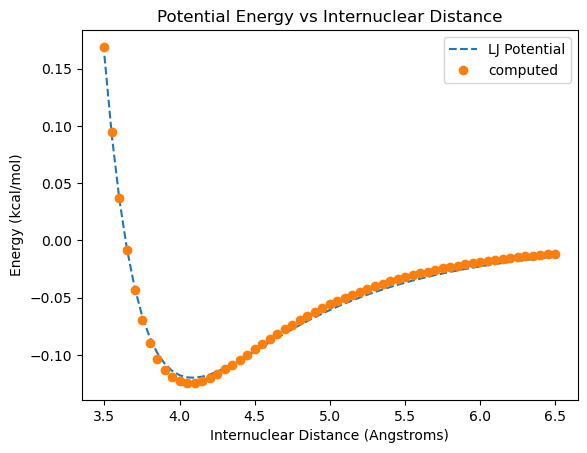

<Figure size 640x480 with 0 Axes>

In [3]:
#LJ potential

def lj(r, sigma, eps):
    return 4*eps*((sigma/r)**12-(sigma/r)**6)

x = np.arange(3.5, 6.55, 0.05)

energy = [0.168852, 0.094957, 0.036770, -0.008587, -0.043503, -0.069952, -0.089566, -0.103685, -0.113411, -0.119645,
          -0.123122, -0.124440, -0.124085, -0.122449, -0.119848, -0.116537, -0.112720, -0.108558, -0.104181, -0.099690,
          -0.095162, -0.090660, -0.086229, -0.081904, -0.077709, -0.073663, -0.069778, -0.066059, -0.062511, -0.059134,
          -0.055927, -0.052885, -0.050005, -0.047281, -0.044707, -0.042277, -0.039984, -0.037822, -0.035784, -0.033864,
          -0.032054, -0.030350, -0.028745, -0.027233, -0.025810, -0.024469, -0.023206, -0.022016, -0.020895, -0.019839,
          -0.018843, -0.017904, -0.017018, -0.016183, -0.015394, -0.014650, -0.013947, -0.013282, -0.012655, -0.012061,
          -0.011500]

pot, pot_cov = curve_fit(lj, x, energy) 

print (pot)

sigma = pot[0]
eps = pot[1]


plt.plot(x, lj(x, sigma, eps), linestyle = 'dashed', label = "LJ Potential")
plt.plot(x, energy, "o", label = "computed")

plt.xlabel('Internuclear Distance (Angstroms)')
plt.ylabel('Energy (kcal/mol)')
plt.legend()
plt.title('Potential Energy vs Internuclear Distance')
plt.show()

plt.savefig('/home/rmo302/compclass/comp-lab-class/Week10/Figures/Potential Energy vs Internuclear Distance.pdf')